In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
from scipy.integrate import solve_ivp

In [2]:
# Hamiltonian of electron spin in magnetic field
hamiltonian = np.array([[0, 1.0],[1.0, 0]])
hamiltonian = -1*const.physical_constants['Bohr magneton'][0]*hamiltonian

# Create density matrix with initial conditions
density_matrix_init  = np.array([1.0, 0, 0, 0]).astype(complex)

In [3]:
# Helper Functions
def commutator(matA, matB):
    return (np.matmul(matA, matB) - np.matmul(matB, matA))

def density_dot(time, density_matrix):
    # Von Neumann Contribution
    density_reshape = density_matrix.reshape((2,2))
    current_density_dot = (-1j/const.hbar)*commutator(hamiltonian, density_reshape)
    return (current_density_dot.reshape((1,-1)))

In [4]:
# Time Parameters
T_MIN = 0
T_MAX = 60e-12
# Solve the initial value problem
sol = solve_ivp(density_dot, [T_MIN, T_MAX], density_matrix_init, max_step=T_MAX/1000)

In [5]:
# Extract Pppulations
density_matrix_00 = sol.y[0]
density_matrix_11 = sol.y[3]

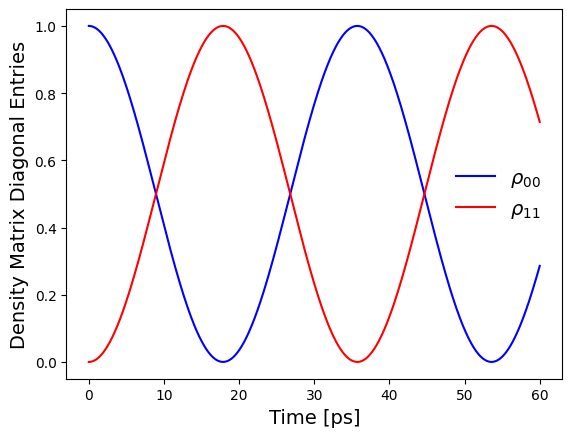

In [6]:
# Plotting
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(sol.t*1e12, density_matrix_00.real, label=r"$\rho_{00}$", color='b')
ax1.plot(sol.t*1e12, density_matrix_11.real, label=r"$\rho_{11}$", color='r')

# Legend Placement
ax1.legend(fontsize=14, frameon=False, loc='center left', bbox_to_anchor=(0.75,0.5))
ax1.set_xlabel('Time [ps]', fontsize=14)
ax1.set_ylabel('Density Matrix Diagonal Entries', fontsize=14)
plt.show()